* Key: earnings, earnings growth, companies with higher margins, debt level(Long-Term Debt) of company, financial strength good, Operating margin, Low capex requirement, earnings-per-share growth rate (%), Net Current Asset Value Per Share (NCAVPS), company with ROIC and ROE of more than 15%, EPS of more than 12%, Interest Coverage Ratio more than 5, Price-to-Earnings ratio (P/E ratio).

* Avoid cyclical business(prefers businesses with a long product cycle and short consumer purchase cycle), sectors of healthcare, manufacture food, beverages, household and personal products, packaging, consumer staples or tobacco. Investors should avoid the companies in the highly cyclical sectors such as basic materials, computer hardware, telecom, and semiconductor.
companies, no matter how attractive the opportunities appear.
* Always avoid companies that have too much debt.
* Buy good businesses that are not Cyclical and to invest only in companies whose products have a short
customer repurchase cycle and long product cycles. Good examples of such
products are mostly consumer staples such as toothpaste, baking soda, and
condoms. The products are consumed daily by customers and will need to be
purchased again quickly, no matter how the economy is doing. Also,
consumers usually purchase them with cash instead of credit. These
companies don't have to continually invent new technologies and keep
competing with new generations of products. Coca-Cola has been selling the
same drink for many decades, which represents the long product cycle.
* The company needs to be 100 percent profitable over the past ten years
and have the ten-year median operating margin of 10 percent or higher.
The company needs to show reasonable growth capability. The growth
rates of revenue and earnings should be 5 percent or higher.
The company needs to have a strong balance sheet. A strong balance
sheet is essential to the survival of the company and the safety of
dividends. In GuruFocus's scale of financial strength ranking, from 1 to
10, the financial strength needs to be 6 or higher.
The company needs to be highly profitable. Only when it is profitable
can it generate enough cash to pay out dividends and maintain solid
financial strength. In GuruFocus's scale of profitability ranking, from 1
to 10, the profitability needs to be 7 or higher.
The company needs to demonstrate consistent past performance and
profitability. This is guaranteed through GuruFocus Predictability Rank
of 2.5-star or higher.
The company needs to have a reasonably high return on invested
capital. GuruFocus requires a ten-year median return on invested capital
of 10 percent or higher. This is the requirement for high-quality
companies.


* Interest Coverage = Operating Income / Net Interest Income
An Interest Coverage higher than
10 means that the Operating Income is more than ten times the interest
payment on the debt. Operating Income covers need cover at least ten times the
interest payment on its debt.
320/96 = 3.3.

* Checklist for Buying Good Companies at
Reasonable Prices
Here, I summarize the questions we will ask for investing in good
companies at fair prices.
1. Do I understand the business?
2. What is the economic moat that protects the company so it can sell the
same or a similar product five or ten years from today?
3. Is this a fast-changing industry?
4. Does the company have a diversified customer base?
5. Is this an asset-light business?
6. Is it a cyclical business?
7. Does the company still have room to grow?
8. Has the company been consistently profitable over the past ten years,
through good times and bad?
9. Does the company have a stable double-digit operating margin?
10. Does the company have a higher margin than competitors?
11. Does the company have a return on investment capital of 15 percent or
higher over the past decade?
12. Has the company been consistently growing its revenue and earnings at
double digits?
13. Does the company have a strong balance sheet?
14. Do company executives own decent shares of stock of the company?

15. How are the executives paid compared with other similarly sized
companies?
16. Are insiders buying?
17. Is the stock valuation reasonable as measured by intrinsic value, or P/E
ratio?
18. How is the current valuation relative to historical range?
19. How did the company's stock price fare during the previous recessions?
20. How much confidence do I have in my research?


<h4>Libraries</<h4>

In [9]:
import numpy as np
import pandas as pd
import scipy
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Import data</h4>

In [14]:
ticket = yf.Ticker('EURUSD=X')
dataset = ticket.history(period='max', interval='2m', auto_adjust=True).drop(columns=['Volume', 'Dividends', 'Stock Splits']).rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}).round(5) # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
dataset['date'] = dataset.index
dataset.reset_index(drop=True, inplace=True)
dataset

- EURUSD=X: 1h data not available for startTime=1070236800 and endTime=1661739493. The requested range must be within the last 730 days.


KeyError: "['Dividends' 'Stock Splits'] not found in axis"

<h4>Feature Engineering</h4>

In [12]:

dataset['date'] = pd.to_datetime(dataset['date'])
dataset['day'] = dataset['date'].dt.day
dataset['day_of_year'] = dataset['date'].dt.dayofyear 
dataset['weekday'] = dataset['date'].apply(lambda x: x.weekday()) # Monday = 0 / Friday = 4	
dataset['month'] = dataset['date'].dt.month
dataset['previous_close'] = dataset['close'].shift(-1)
dataset

,open,high,low,close,date,day,day_of_year,weekday,month,mean_close,median_close,previous_close
0,1.20340,1.20401,1.19440,1.19650,2003-12-01,1,335,0,12,1.253134,1.2415,1.20890
1,1.19610,1.21090,1.19460,1.20890,2003-12-02,2,336,1,12,1.253134,1.2415,1.21230
2,1.20900,1.21300,1.20770,1.21230,2003-12-03,3,337,2,12,1.253134,1.2415,1.20809
3,1.21200,1.21440,1.20440,1.20809,2003-12-04,4,338,3,12,1.253134,1.2415,1.21869
4,1.20780,1.21910,1.20659,1.21869,2003-12-05,5,339,4,12,1.253134,1.2415,1.22200
...,...,...,...,...,...,...,...,...,...,...,...,...
4766,1.08153,1.08158,1.07836,1.08153,2022-04-18,18,108,0,4,1.253134,1.2415,1.07818
4767,1.07818,1.08121,1.07619,1.07818,2022-04-19,19,109,1,4,1.253134,1.2415,1.07945
4768,1.07945,1.08672,1.07848,1.07945,2022-04-20,20,110,2,4,1.253134,1.2415,1.08499
4769,1.08499,1.09347,1.08244,1.08499,2022-04-21,21,111,3,4,1.253134,1.2415,1.08352


<h4>Explore the data</h4>

In [4]:
print(f'No. of Observations: {dataset.shape[0]}')
print(f'No. of Variables (columns): {dataset.shape[1]}')
print(dataset.describe(), '\n')
print(dataset.info(), '\n')
print(dataset.dtypes, '\n')

No. of Observations: 4771
No. of Variables (columns): 11
              open         high         low        close          day  \
count  4771.000000  4771.000000  4771.00000  4771.000000  4771.000000   
mean      1.253108     1.257787     1.24798     1.253134    15.728568   
std       0.119427     0.120190     0.11996     0.119416     8.801247   
min       1.039390     1.041990     0.07290     1.039050     1.000000   
25%       1.144590     1.147755     1.13987     1.144730     8.000000   
50%       1.241200     1.246810     1.23657     1.241500    16.000000   
75%       1.337900     1.342750     1.33300     1.338020    23.000000   
max       1.598180     1.602820     1.58740     1.598800    31.000000   

       day_of_year      weekday        month    mean_close  median_close  
count  4771.000000  4771.000000  4771.000000  4.771000e+03     4771.0000  
mean    181.557326     2.001886     6.470761  1.253134e+00        1.2415  
std     106.438568     1.414879     3.481026  2.220679e-16  

<h4>Correlation Estimate</h4>

In [5]:
dataset.corr()

,open,high,low,close,day,day_of_year,weekday,month,mean_close,median_close
open,1.000000,0.999244,0.980656,0.999077,0.005074,0.012223,0.002415,0.012038,NaN,NaN
high,0.999244,1.000000,0.980162,0.999239,0.005704,0.012362,0.004200,0.012112,NaN,NaN
low,0.980656,0.980162,1.000000,0.980669,0.005342,0.018473,0.002413,0.018306,NaN,NaN
close,0.999077,0.999239,0.980669,1.000000,0.005944,0.013158,0.002928,0.012907,NaN,NaN
day,0.005074,0.005704,0.005342,0.005944,1.000000,0.095153,-0.002450,0.012684,NaN,NaN
day_of_year,0.012223,0.012362,0.018473,0.013158,0.095153,1.000000,0.000592,0.996565,NaN,NaN
weekday,0.002415,0.004200,0.002413,0.002928,-0.002450,0.000592,1.000000,0.000799,NaN,NaN
month,0.012038,0.012112,0.018306,0.012907,0.012684,0.996565,0.000799,1.000000,NaN,NaN
mean_close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Visualize the Raw data</h4>

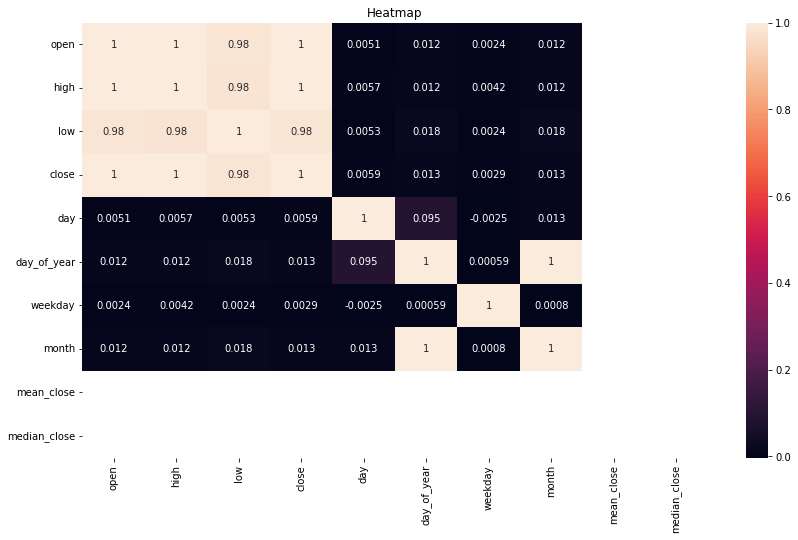

In [6]:
plt.figure(figsize=(14, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.title('Heatmap')
plt.show()

<h4>Create filter</h4>

In [7]:
dataset_MA = dataset.copy()
dataset_MA['MA'] = dataset_MA['close'].rolling(window=21).mean()
dataset_MA.loc[dataset['open'] > dataset_MA['MA']]
print(dataset_MA.iloc[:-1, :])

         open     high      low    close       date  day  day_of_year  \
0     1.20340  1.20401  1.19440  1.19650 2003-12-01    1          335   
1     1.19610  1.21090  1.19460  1.20890 2003-12-02    2          336   
2     1.20900  1.21300  1.20770  1.21230 2003-12-03    3          337   
3     1.21200  1.21440  1.20440  1.20809 2003-12-04    4          338   
4     1.20780  1.21910  1.20659  1.21869 2003-12-05    5          339   
...       ...      ...      ...      ...        ...  ...          ...   
4765  1.08210  1.08234  1.07988  1.08210 2022-04-15   15          105   
4766  1.08153  1.08158  1.07836  1.08153 2022-04-18   18          108   
4767  1.07818  1.08121  1.07619  1.07818 2022-04-19   19          109   
4768  1.07945  1.08672  1.07848  1.07945 2022-04-20   20          110   
4769  1.08499  1.09347  1.08244  1.08499 2022-04-21   21          111   

      weekday  month  mean_close  median_close        MA  
0           0     12    1.253134        1.2415       NaN  
1    

<h4>Group By</h4>

In [8]:
print(dataset.groupby('close').mean())

            open     high      low   day  day_of_year  weekday  month  \
close                                                                   
1.03905  1.03939  1.04515  1.03853  21.0        356.0      2.0   12.0   
1.04058  1.04047  1.04199  1.03552  20.0        355.0      1.0   12.0   
1.04170  1.04178  1.04910  1.04178  29.0        364.0      3.0   12.0   
1.04188  1.04178  1.04723  1.04037  16.0        351.0      4.0   12.0   
1.04199  1.04184  1.04789  1.03913   4.0          4.0      2.0    1.0   
...          ...      ...      ...   ...          ...      ...    ...   
1.59119  1.58040  1.59431  1.57988  21.0        112.0      0.0    4.0   
1.59139  1.58341  1.59309  1.58321  21.0        203.0      0.0    7.0   
1.59490  1.57871  1.59490  1.57679  11.0        193.0      4.0    7.0   
1.59581  1.57841  1.59760  1.57801  16.0        107.0      2.0    4.0   
1.59880  1.59114  1.60131  1.58431  22.0        113.0      1.0    4.0   

         mean_close  median_close  
close         

<h4>Outliers</h4>

No handles with labels found to put in legend.


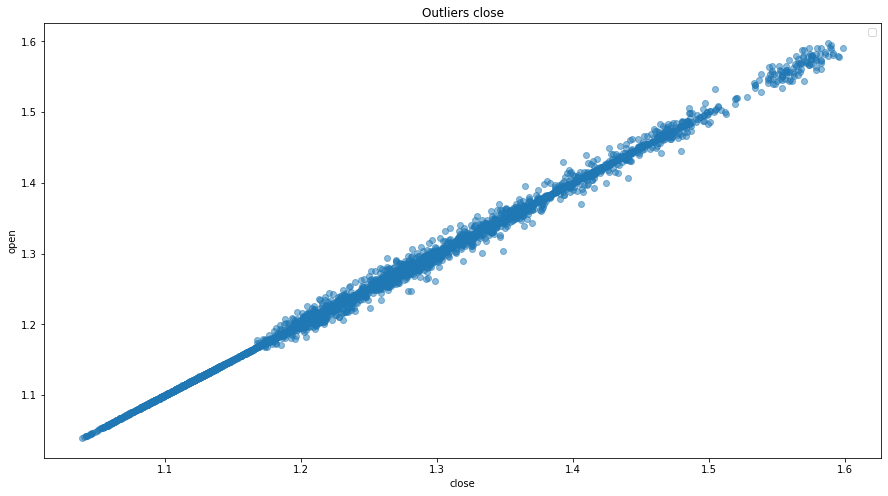

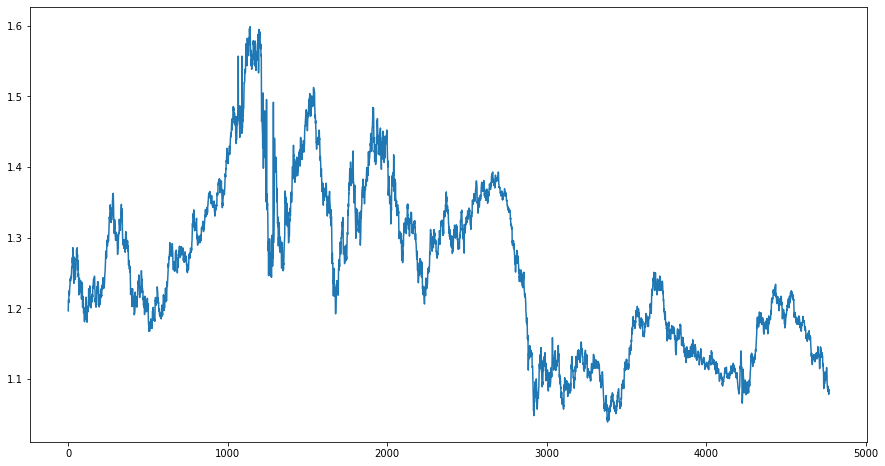

In [9]:
x = dataset['close']
y = dataset['open']
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("close")
plt.ylabel("open")
plt.legend()
plt.title('Outliers close')
plt.show()

plt.figure(figsize=(15, 8))
plt.plot(x)
plt.show()



<h4>Histogram Plot</h4>

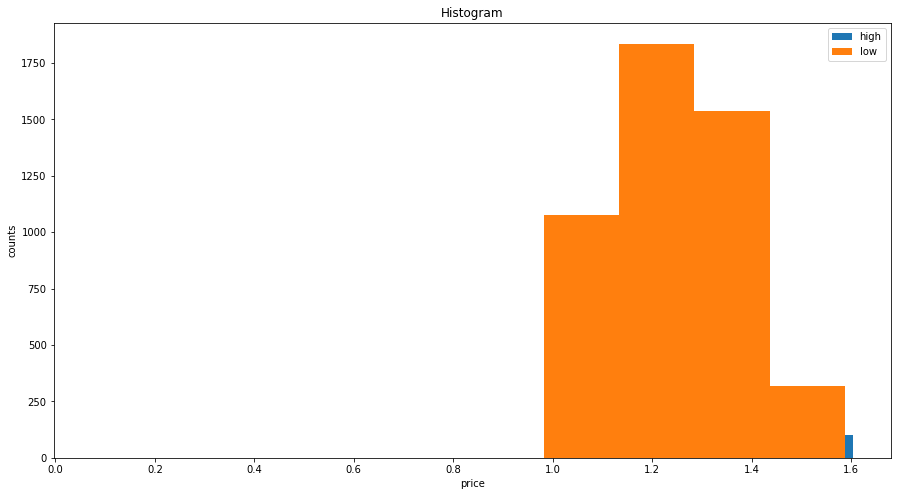

In [10]:
plt.figure(figsize=(15, 8))
plt.hist(dataset['high'], label='high')
plt.hist(dataset['low'], label='low')
plt.xlabel("price")
plt.ylabel("counts")
plt.legend()
plt.title('Histogram')
plt.show()
